In [10]:
# Required Imports

import numpy as np 
import pandas as pd
from urllib.request import urlopen
import json
import ast
import sys
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
import json
import matplotlib.pyplot as plt
from fbprophet import Prophet


'2020-09-21'

In [174]:
from datetime import date

# Creating a stock_data class to return the stock data for which it was searched. 
class stock_data:
    
    def get_jsonparsed_data(self, url):
        """
        Receive the content of ``url``, parse it as JSON and return the object.

        Parameters
        ----------
        url : str

        Returns
        -------
        dict
        """

        response = urlopen(url)
        response = response.read()
        info = response.decode("utf-8")
        info =  ast.literal_eval(info[39:-2])
        result = info['ResultSet']['Result']

        return result



    def get_stockSymbol(self, compName):
        
        """To get the Stock Symbol/Token Name"""
        
        compName = compName.strip()
        
        check_space = compName.split(' ')
        if len(check_space) > 1:
            api_link = f'http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={check_space[0]}+{check_space[1]}&region=1&lang=en&callback=YAHOO.Finance.SymbolSuggest.ssCallback'

        else:
            api_link = f'http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={compName}&region=1&lang=en&callback=YAHOO.Finance.SymbolSuggest.ssCallback'

        result = self.get_jsonparsed_data(api_link)
        
        if result:
            stock_symbol = result[0]['symbol']
            return stock_symbol
        else:
            return "Incorrect company name"
    
    
    def get_company_prediction(self, comp_ticker, num_days_to_predict):
        
        result = {}
#         yf.pdr_override() # <== that's all it takes :-)

        # Generating Today's date for the uptodate record
        curr_date = datetime.today().strftime('%Y-%m-%d')

        # download dataframe using pandas_datareader
        # data = pdr.get_data_yahoo(comp_ticker, start="2019-01-01", end= curr_d1)
        data = yf.download(comp_ticker, start="2018-01-01", end=curr_date,)

        # Selecting only the closing price for the model
        close_price = data[['Close']]

        # Making date as a column from index
        date_index = list(close_price.index)
        
        close_price.insert(1,'Date', date_index, True)
        
    
#         date_index = pd.Series(date_index)
#         close_price['Date'] = date_index

        # Rename the features: These names are NEEDED for the model fitting
        close_price = close_price.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset

        # Fitting the prophet model
        m = Prophet(daily_seasonality = True) # the Prophet class (model)
        m.fit(close_price) # fit the model using all data

        future = m.make_future_dataframe(periods= num_days_to_predict) #we need to specify the number of days in future
        prediction = m.predict(future)
        
        date = list(prediction['ds'])
        
        #Converting the date from timestamp to string formate
        
        date_in_str = []
        for d in date:
            d = str(d).split(' ')[0]
            
            date_in_str.append(d)

        stock_data = list(prediction['yhat'].iloc[:-num_days_to_predict])

        pred_data = list(prediction['yhat'].iloc[-num_days_to_predict:])
        
        result['date'] =  date_in_str
        
        result['stock_values'] = stock_data
        
        result['stock_pred_values'] = pred_data

        result = json.dumps(result)
        return result
    
    
# Main method to run the code
if __name__ == "__main__":
    ticker = stock_data().get_stockSymbol("microsoft")
    print(stock_data().get_company_prediction(ticker, 30))


[*********************100%***********************]  1 of 1 completed
{"date": ["2018-01-02", "2018-01-03", "2018-01-04", "2018-01-05", "2018-01-08", "2018-01-09", "2018-01-10", "2018-01-11", "2018-01-12", "2018-01-16", "2018-01-17", "2018-01-18", "2018-01-19", "2018-01-22", "2018-01-23", "2018-01-24", "2018-01-25", "2018-01-26", "2018-01-29", "2018-01-30", "2018-01-31", "2018-02-01", "2018-02-02", "2018-02-05", "2018-02-06", "2018-02-07", "2018-02-08", "2018-02-09", "2018-02-12", "2018-02-13", "2018-02-14", "2018-02-15", "2018-02-16", "2018-02-20", "2018-02-21", "2018-02-22", "2018-02-23", "2018-02-26", "2018-02-27", "2018-02-28", "2018-03-01", "2018-03-02", "2018-03-05", "2018-03-06", "2018-03-07", "2018-03-08", "2018-03-09", "2018-03-12", "2018-03-13", "2018-03-14", "2018-03-15", "2018-03-16", "2018-03-19", "2018-03-20", "2018-03-21", "2018-03-22", "2018-03-23", "2018-03-26", "2018-03-27", "2018-03-28", "2018-03-29", "2018-04-02", "2018-04-03", "2018-04-04", "2018-04-05", "2018-04-06

## Testing the model fitting and their output

In [5]:
comp_ticker = "GOOG"

yf.pdr_override() # <== that's all it takes :-)

# Generating Today's date for the uptodate record
curr_date = datetime.today().strftime('%Y-%m-%d')

# download dataframe using pandas_datareader
# data = pdr.get_data_yahoo(comp_ticker, start="2019-01-01", end= curr_d1)
data = yf.download(comp_ticker, start="2018-01-01", end=curr_date,)

# Selecting only the closing price for the model
close_price = data[['Close']]
close_price['Date'] = close_price.index

# Rename the features: These names are NEEDED for the model fitting
close_price = close_price.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset

close_price.head()

[*********************100%***********************]  1 of 1 completed


/Users/hiteshsaaimanancherypanneerselvam/anaconda3/envs/stock/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,y,ds
Date,,
2018-01-02,1065.000000,2018-01-02
2018-01-03,1082.479980,2018-01-03
2018-01-04,1086.400024,2018-01-04
2018-01-05,1102.229980,2018-01-05
2018-01-08,1106.939941,2018-01-08


In [6]:
close_price.tail()

,y,ds
Date,,
2020-09-15,1541.439941,2020-09-15
2020-09-16,1520.900024,2020-09-16
2020-09-17,1495.530029,2020-09-17
2020-09-18,1459.989990,2020-09-18
2020-09-21,1431.160034,2020-09-21


In [7]:
# Fitting the prophet model
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(close_price) # fit the model using all data


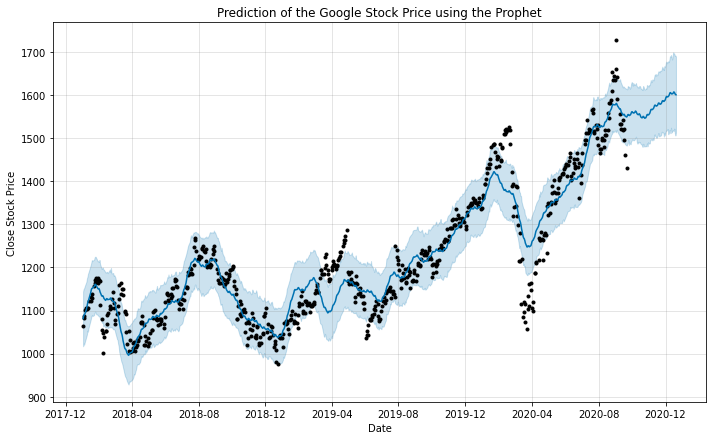

In [11]:
future = m.make_future_dataframe(periods=90) #we need to specify the number of days in future
prediction = m.predict(future)

m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()



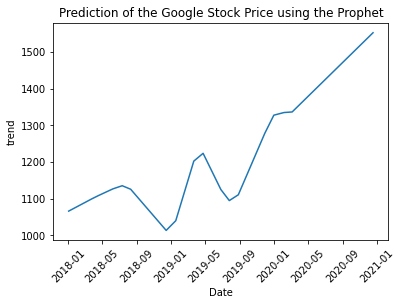

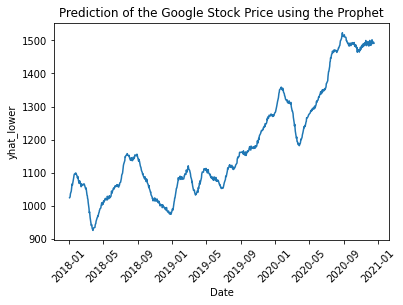

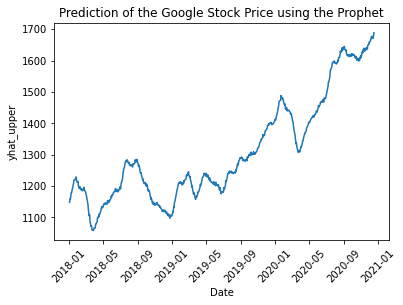

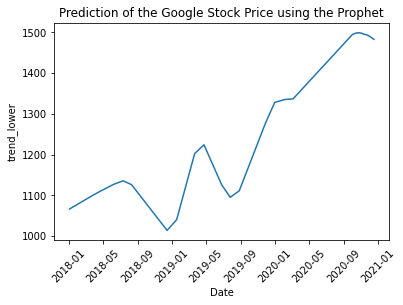

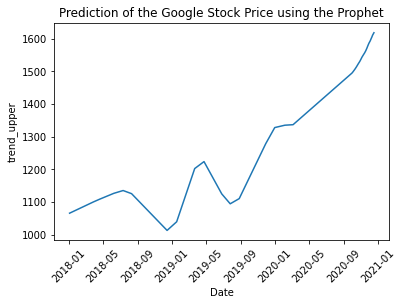

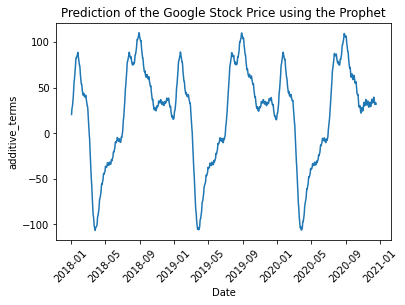

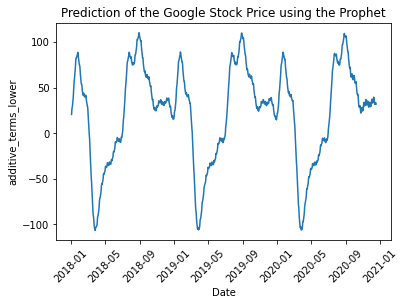

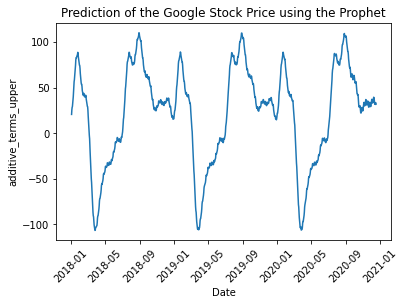

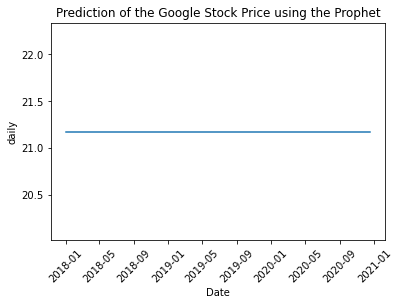

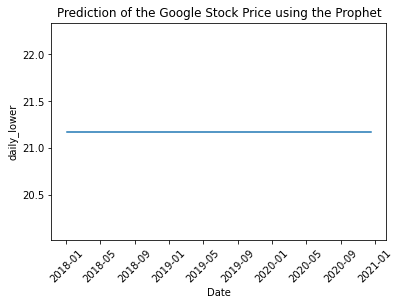

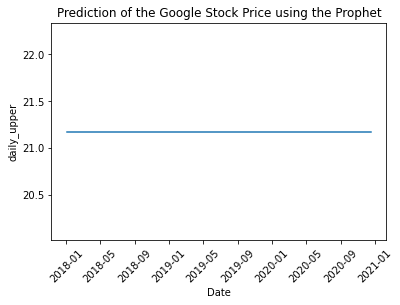

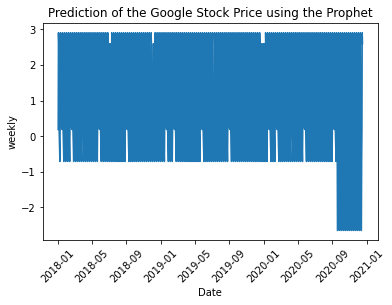

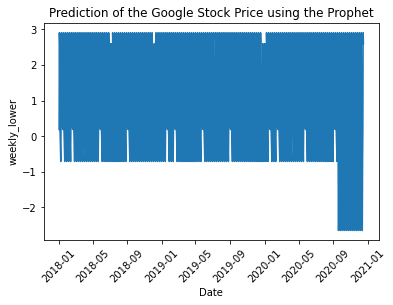

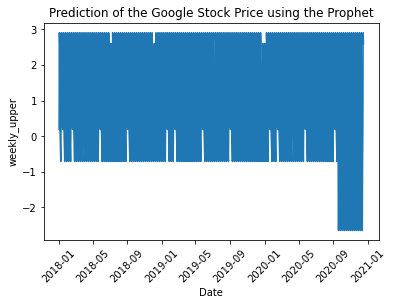

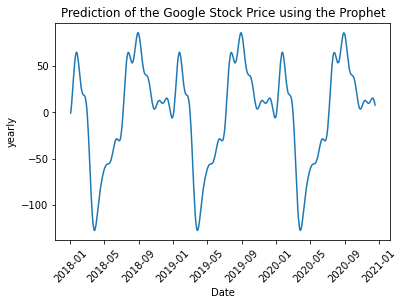

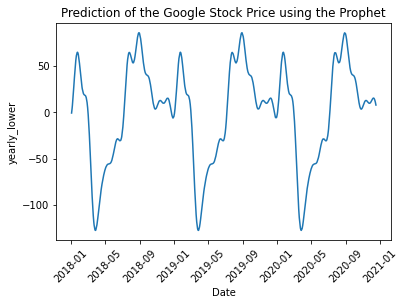

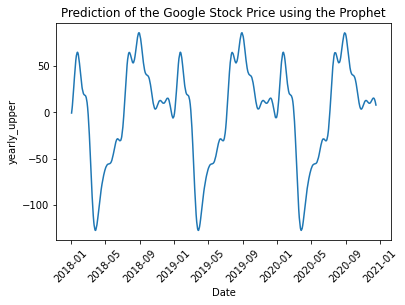

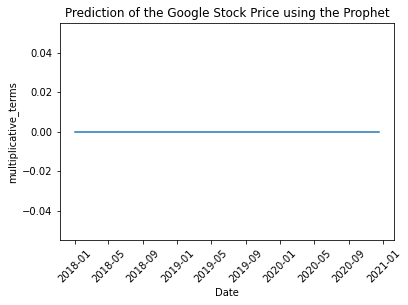

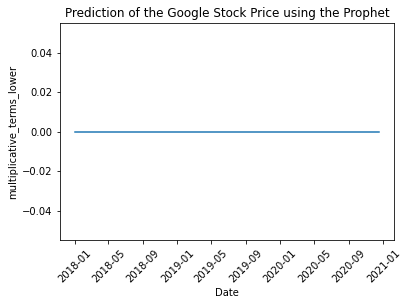

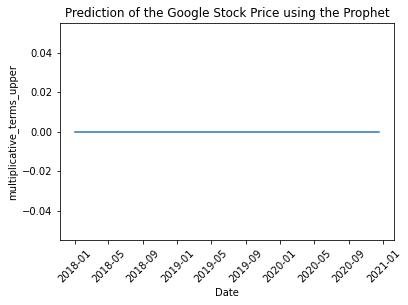

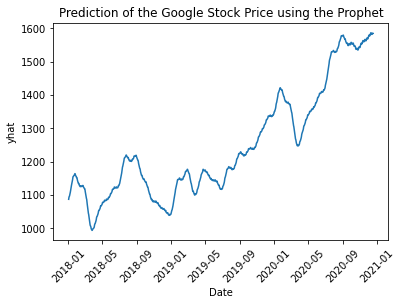

In [120]:
lst = ['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat']

for y_axis in lst:
    plt.plot(prediction['ds'], prediction[y_axis])
    plt.title("Prediction of the Google Stock Price using the Prophet")
    plt.xlabel("Date")
    plt.ylabel(y_axis)
    plt.xticks(rotation=45)
    plt.show()

    
# prediction.columns


In [82]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [13]:
date = list(prediction['ds'])
print(len(date))
given_data = prediction['yhat'].iloc[:-90]
print(len(given_data))
pred = list(prediction['yhat'].iloc[-90:])
print(len(pred))


775
685
90


In [135]:
lst = [1,3,4,4,5,7,78]
lst[-3:]

[5, 7, 78]

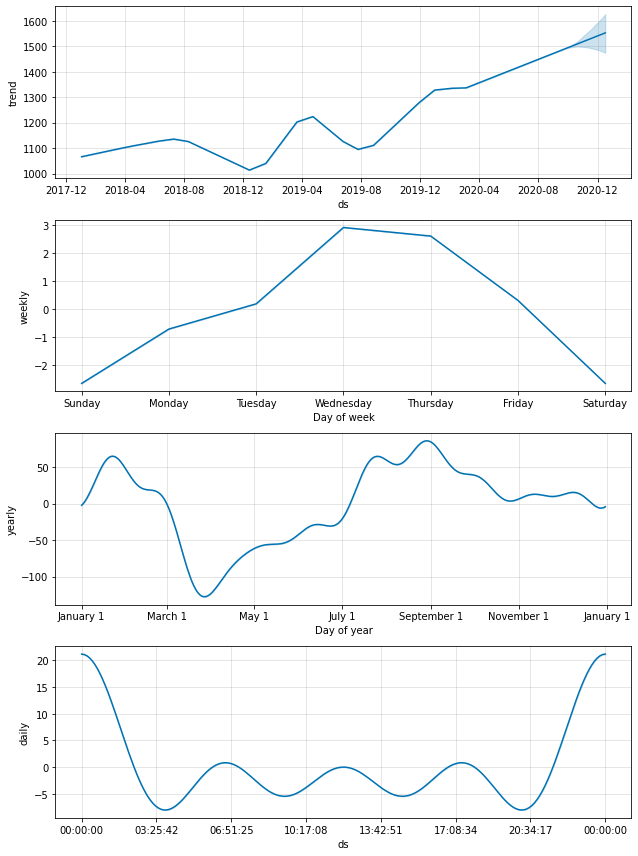

In [99]:
m.plot_components(prediction)

plt.show()

In [105]:


prediction.columns


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [106]:
prediction[['ds','weekly']]


,ds,weekly
0,2018-01-02,0.188036
1,2018-01-03,2.906871
2,2018-01-04,2.601438
3,2018-01-05,0.307640
4,2018-01-08,-0.710411
...,...,...
769,2020-12-13,-2.646787
770,2020-12-14,-0.710411
771,2020-12-15,0.188036
772,2020-12-16,2.906871


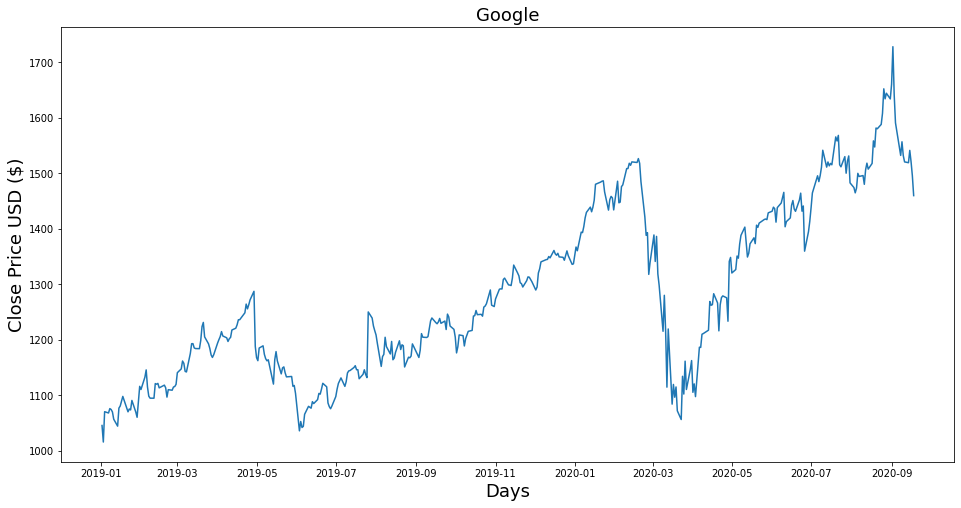

In [31]:
# Visualizing the the time series 

plt.figure(figsize=(16,8))
plt.title('Google', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(close_price['y'])
plt.show()
